In [1]:
#pip install quandl

In [2]:
# Dependencies
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from config import API_key

import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine

# PRIME RATE
The prime rate is a guiding interest rate that lenders reference when they set interest rates for consumers on things like credit cards, loans or mortgages. The current prime rate is 3.25%.

Average Reported Prime Rate,Weighted by the Amount Loans Priced Relative to Prime, by Base Pricing Rate

In [3]:
prime_rate = pd.read_csv("../project_3/static/data/MPRIME.csv")
prime_rate.head()

,Date,MPRIME
0,1949-01-01,2.0
1,1949-01-02,2.0
2,1949-03-01,2.0
3,1949-04-01,2.0
4,1949-05-01,2.0


In [4]:
# change datatype of date column to datetime
prime_rate['Date'] = pd.to_datetime(prime_rate['Date'])

In [5]:
# Filter data for 15 years
filtered_prime_rate = prime_rate.loc[(prime_rate['Date'] >= '2006-01-01') ]
                     
filtered_prime_rate.head()

,Date,MPRIME
684,2006-01-01,7.26
685,2006-02-01,7.50
686,2006-03-01,7.53
687,2006-04-01,7.75
688,2006-05-01,7.93


In [6]:
# SET DATE AS INDEX
filtered_prime_rate_df =filtered_prime_rate.set_index('Date')
filtered_prime_rate_df.tail()

,MPRIME
Date,
2020-09-01,3.25
2020-10-01,3.25
2020-11-01,3.25
2020-12-01,3.25
2021-01-01,3.25


# FREDDIE-MAC's  30-Year Fixed Rate Mortgage Average in the United States

In [7]:
# FREDDIE-MAC's 30-Year Fixed Rate Mortgage Average in the United States
home_mortgage_avg_rate_30 = quandl.get("FMAC/30US", authtoken=API_key)
home_mortgage_avg_rate_30.tail()

,Value
Date,
2021-02-11,2.73
2021-02-18,2.81
2021-02-25,2.97
2021-03-04,3.02
2021-03-11,3.05


In [8]:
home_mortgage_avg_rate_30 = home_mortgage_avg_rate_30.reset_index()
home_mortgage_avg_rate_30.tail()

,Date,Value
2604,2021-02-11,2.73
2605,2021-02-18,2.81
2606,2021-02-25,2.97
2607,2021-03-04,3.02
2608,2021-03-11,3.05


In [9]:
home_mortgage_avg_rate_30_filter = home_mortgage_avg_rate_30.loc[(home_mortgage_avg_rate_30['Date'] >= '2006-01-01') ]
home_mortgage_avg_rate_30_filter.head()

,Date,Value
1814,2006-01-05,6.21
1815,2006-01-12,6.15
1816,2006-01-19,6.10
1817,2006-01-26,6.12
1818,2006-02-02,6.23


In [10]:
home_mortgage_avg_rate_30_filter = home_mortgage_avg_rate_30_filter.set_index('Date')
home_mortgage_avg_rate_30_filter.tail()

,Value
Date,
2021-02-11,2.73
2021-02-18,2.81
2021-02-25,2.97
2021-03-04,3.02
2021-03-11,3.05


# 15-Year Fixed Rate Mortgage Average in the United States

In [11]:
home_mortgage_avg_rate_15 = quandl.get("FMAC/15US", authtoken=API_key)
home_mortgage_avg_rate_15.tail()

,Value
Date,
2021-02-11,2.19
2021-02-18,2.21
2021-02-25,2.34
2021-03-04,2.34
2021-03-11,2.38


In [12]:
home_mortgage_avg_rate_15 = home_mortgage_avg_rate_15.reset_index()
home_mortgage_avg_rate_15.tail()

,Date,Value
1539,2021-02-11,2.19
1540,2021-02-18,2.21
1541,2021-02-25,2.34
1542,2021-03-04,2.34
1543,2021-03-11,2.38


In [13]:
home_mortgage_avg_rate_15_filter = home_mortgage_avg_rate_15.loc[(home_mortgage_avg_rate_15['Date'] >= '2006-01-01') ]
                     
home_mortgage_avg_rate_15_filter.tail()

,Date,Value
1539,2021-02-11,2.19
1540,2021-02-18,2.21
1541,2021-02-25,2.34
1542,2021-03-04,2.34
1543,2021-03-11,2.38


In [14]:
home_mortgage_avg_rate_15_filter = home_mortgage_avg_rate_15_filter.set_index('Date')
home_mortgage_avg_rate_15_filter.tail()

,Value
Date,
2021-02-11,2.19
2021-02-18,2.21
2021-02-25,2.34
2021-03-04,2.34
2021-03-11,2.38


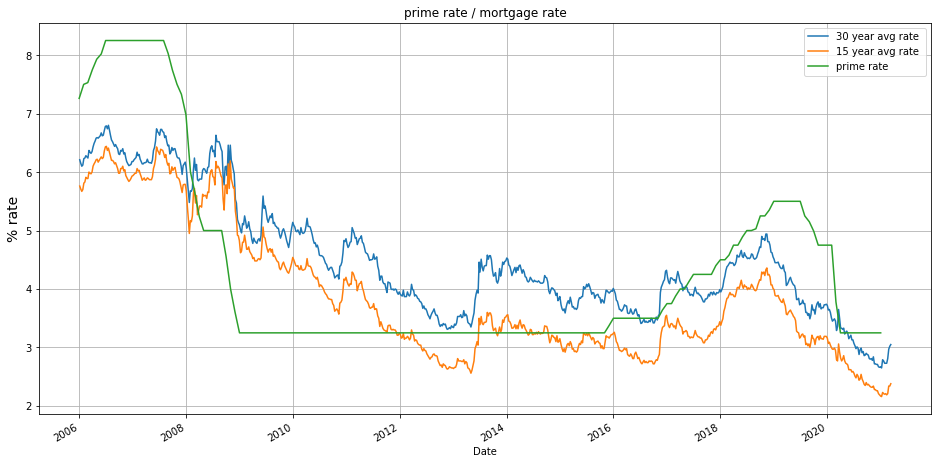

In [15]:
# plot based on opening prices
fig,ax = plt.subplots()

home_mortgage_avg_rate_30_filter['Value'].plot (label = '30 year avg rate ', figsize = (16,8))
home_mortgage_avg_rate_15_filter['Value'].plot (label = '15 year avg rate')
#home_mortgage_avg_rate_5_filter['Value'].plot (label = '5 year avg rate')


# home_mortgage_refinance_rate_filter['Value'].plot (label = 'refinance rate')
filtered_prime_rate_df['MPRIME'].plot( label = 'prime rate')

ax.set_ylabel("% rate",fontsize=14)
ax.set_title("prime rate / mortgage rate")
plt.grid()

plt.legend();

# 5/1-Year Adjustable Rate Mortgage Average in the United States


In [16]:
home_mortgage_avg_rate_5 = quandl.get("FMAC/5US", authtoken=API_key)
home_mortgage_avg_rate_5.tail()

,Value
Date,
2021-02-11,2.79
2021-02-18,2.77
2021-02-25,2.99
2021-03-04,2.73
2021-03-11,2.77


In [17]:
home_mortgage_avg_rate_5 = home_mortgage_avg_rate_5.reset_index()
home_mortgage_avg_rate_5.tail()

,Date,Value
842,2021-02-11,2.79
843,2021-02-18,2.77
844,2021-02-25,2.99
845,2021-03-04,2.73
846,2021-03-11,2.77


In [18]:
home_mortgage_avg_rate_5_filter = home_mortgage_avg_rate_5.loc[(home_mortgage_avg_rate_5['Date'] >= '2016-01-01') ]
home_mortgage_avg_rate_5_filter.tail()

,Date,Value
842,2021-02-11,2.79
843,2021-02-18,2.77
844,2021-02-25,2.99
845,2021-03-04,2.73
846,2021-03-11,2.77


In [19]:
home_mortgage_avg_rate_5_filter = home_mortgage_avg_rate_5_filter.set_index('Date')
home_mortgage_avg_rate_5_filter.tail()

,Value
Date,
2021-02-11,2.79
2021-02-18,2.77
2021-02-25,2.99
2021-03-04,2.73
2021-03-11,2.77


In [20]:
home_mortgage_avg_rate_7 = quandl.get("WFC/PR_CON_71ARM_APR", authtoken=API_key)
home_mortgage_avg_rate_7.tail()

,Value
Date,
2020-08-27,2.92
2020-08-28,2.93
2020-08-29,2.93
2020-08-30,2.93
2020-08-31,2.92


In [21]:
home_mortgage_avg_rate_7 = home_mortgage_avg_rate_7.reset_index()
home_mortgage_avg_rate_7.tail()

,Date,Value
1630,2020-08-27,2.92
1631,2020-08-28,2.93
1632,2020-08-29,2.93
1633,2020-08-30,2.93
1634,2020-08-31,2.92


In [22]:
home_mortgage_avg_rate_7_filter = home_mortgage_avg_rate_7.loc[(home_mortgage_avg_rate_7['Date'] >= '2016-01-01') ]
                     
home_mortgage_avg_rate_7_filter.tail()

,Date,Value
1630,2020-08-27,2.92
1631,2020-08-28,2.93
1632,2020-08-29,2.93
1633,2020-08-30,2.93
1634,2020-08-31,2.92


In [23]:
home_mortgage_avg_rate_7_filter = home_mortgage_avg_rate_7_filter.set_index('Date')
home_mortgage_avg_rate_7_filter.tail()

,Value
Date,
2020-08-27,2.92
2020-08-28,2.93
2020-08-29,2.93
2020-08-30,2.93
2020-08-31,2.92


In [24]:
# Filter data for 5 years
filtered_prime_rate_5yrs = prime_rate.loc[(prime_rate['Date'] >= '2016-01-01') ]
                     
filtered_prime_rate_5yrs.tail()

,Date,MPRIME
860,2020-09-01,3.25
861,2020-10-01,3.25
862,2020-11-01,3.25
863,2020-12-01,3.25
864,2021-01-01,3.25


In [25]:
filtered_prime_rate_5yrs_df =filtered_prime_rate_5yrs.set_index('Date')
filtered_prime_rate_5yrs_df.tail()

,MPRIME
Date,
2020-09-01,3.25
2020-10-01,3.25
2020-11-01,3.25
2020-12-01,3.25
2021-01-01,3.25


In [26]:
# home_mortgage_avg_rate_5_filter_5yrs = home_mortgage_avg_rate_5.loc[(home_mortgage_avg_rate_5['Date'] >= '2016-01-01') ]
# home_mortgage_avg_rate_5_filter_5yrs.tail()

# Home Mortgage Loans: Conforming Loan, 7/1 ARM, APR

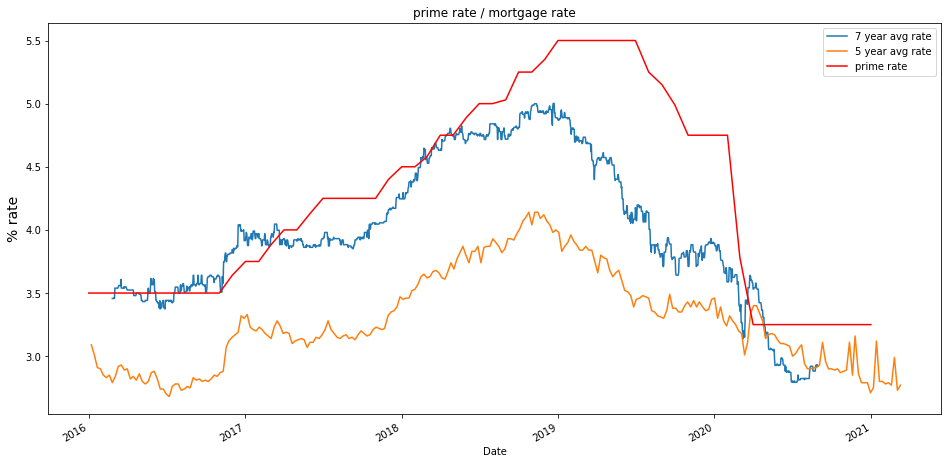

In [27]:
# plot based on prime rate 7 years and 5 years
fig,ax = plt.subplots()


home_mortgage_avg_rate_7_filter['Value'].plot (label = '7 year avg rate', figsize = (16,8))
home_mortgage_avg_rate_5_filter['Value'].plot (label = '5 year avg rate')


# home_mortgage_refinance_rate_filter['Value'].plot (label = 'refinance rate')
filtered_prime_rate_5yrs_df['MPRIME'].plot( label = 'prime rate',color="red")

ax.set_ylabel("% rate",fontsize=14)
ax.set_title("prime rate / mortgage rate")

plt.legend();

In [28]:
# merged_long_term = pd.merge(filtered_prime_rate_df, home_mortgage_avg_rate_30_filter,  how = "inner", on ="Date")
# merged_long_term.tail()

In [29]:
# merged_long_term_df = pd.merge(merged_long_term, home_mortgage_avg_rate_15_filter,  how = "inner", on ="Date")
# len(merged_long_term_df)

In [30]:
# #rename columns
# merged_long_term_df.rename(columns = {'Value_x':'Value_30years','Value_y':'Value_15years'}, inplace = True) 


In [31]:
# # plot based on opening prices
# fig,ax = plt.subplots()

# merged_long_term_df['Value_30years'].plot (label = '30 year avg rate ', figsize = (14,7))
# merged_long_term_df['Value_15years'].plot (label = '15 year avg rate')
# #home_mortgage_avg_rate_5_filter['Value'].plot (label = '5 year avg rate')


# # home_mortgage_refinance_rate_filter['Value'].plot (label = 'refinance rate')
# merged_long_term_df['MPRIME'].plot( label = 'prime rate')

# ax.set_ylabel("% rate",fontsize=14)
# ax.set_title("prime rate / mortgage rate")


# plt.legend();

In [32]:
# merged_short_term = pd.merge(filtered_prime_rate_5yrs_df, home_mortgage_avg_rate_7_filter,  how = "inner", on ="Date")
# merged_short_term.tail()

In [33]:
# merged_short_term_df = pd.merge(merged_short_term, home_mortgage_avg_rate_5_filter,  how = "inner", on ="Date")
# merged_short_term_df

In [34]:
#rename columns
# merged_short_term_df.rename(columns = {'Value_x':'Value_7years','Value_y':'Value_5years'}, inplace = True) 
# merged_short_term_df

In [35]:
# # plot based on opening prices
# fig,ax = plt.subplots()

# merged_short_term_df['Value_7years'].plot (label = '7 year avg rate ', figsize = (14,7))
# merged_short_term_df['Value_5years'].plot (label = '5 year avg rate')
# #home_mortgage_avg_rate_5_filter['Value'].plot (label = '5 year avg rate')


# # home_mortgage_refinance_rate_filter['Value'].plot (label = 'refinance rate')
# filtered_prime_rate_5yrs_df['MPRIME'].plot( label = 'prime rate')

# ax.set_ylabel("% rate",fontsize=14)
# ax.set_title("prime rate / mortgage rate")


# plt.legend();

In [36]:
#filtered_prime_rate_df
#home_mortgage_avg_rate_30_filter
#home_mortgage_avg_rate_15_filter

filtered_prime_rate_5yrs_df
home_mortgage_avg_rate_7_filter
home_mortgage_avg_rate_5_filter


,Value
Date,
2016-01-07,3.09
2016-01-14,3.01
2016-01-21,2.91
2016-01-28,2.90
2016-02-04,2.85
...,...
2021-02-11,2.79
2021-02-18,2.77
2021-02-25,2.99


In [37]:
# deploy to Aws
from config import remote_db_endpoint, remote_db_port
from config import remote_db_name, remote_db_user, remote_db_pwd
import mysql.connector

In [38]:
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [39]:
# home_mortgage_avg_rate_30_filter.to_sql(name='mortgage30y_rates', con=engine, if_exists = 'replace', index=True)

# home_mortgage_avg_rate_15_filter.to_sql(name='mortgage15y_rates', con=engine, if_exists = 'replace', index=True)

# filtered_prime_rate_5yrs_df.to_sql(name='us_5yprime_rate', con=engine, if_exists = 'replace', index=True)

# home_mortgage_avg_rate_7_filter.to_sql(name='mortgage7y_rates', con=engine, if_exists = 'replace', index=True)

# home_mortgage_avg_rate_5_filter.to_sql(name='mortgage5y_rates', con=engine, if_exists = 'replace', index=True)
# #us_prime_rate

In [44]:
query = pd.read_sql("select * from mortgage5y_rates",conn)
data_5yrs =query.to_json(orient ="records")
data_5yrs


'[{"Date":1452124800000,"Value":3.09},{"Date":1452729600000,"Value":3.01},{"Date":1453334400000,"Value":2.91},{"Date":1453939200000,"Value":2.9},{"Date":1454544000000,"Value":2.85},{"Date":1455148800000,"Value":2.83},{"Date":1455753600000,"Value":2.85},{"Date":1456358400000,"Value":2.79},{"Date":1456963200000,"Value":2.84},{"Date":1457568000000,"Value":2.92},{"Date":1458172800000,"Value":2.93},{"Date":1458777600000,"Value":2.89},{"Date":1459382400000,"Value":2.9},{"Date":1459987200000,"Value":2.82},{"Date":1460592000000,"Value":2.84},{"Date":1461196800000,"Value":2.81},{"Date":1461801600000,"Value":2.86},{"Date":1462406400000,"Value":2.8},{"Date":1463011200000,"Value":2.78},{"Date":1463616000000,"Value":2.8},{"Date":1464220800000,"Value":2.87},{"Date":1464825600000,"Value":2.88},{"Date":1465430400000,"Value":2.82},{"Date":1466035200000,"Value":2.74},{"Date":1466640000000,"Value":2.74},{"Date":1467244800000,"Value":2.7},{"Date":1467849600000,"Value":2.68},{"Date":1468454400000,"Value":2